In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

cities_data = {"City": cities, "Country": countries}

cities_df = pd.DataFrame(cities_data)

cities_df.head()

,City,Country
0,tasiilaq,gl
1,banfora,bf
2,taolanaro,mg
3,amderma,ru
4,hithadhoo,mv


## Perform API Calls

In [39]:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude


# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#query_url = f"{url}appid={api_key}&units={units}&q="

row_count = 0

print("---------------")
print("Retrieving Weather Data")
print("---------------")

for index, row in cities_df.iterrows():
    
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(target_url).json()
    
    print("----------------------")
    print("Gathering city #%s: %s" % (row_count + 1,cities_df.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:
        cities_df.set_value(index, "Date", response["dt"])
        cities_df.set_value(index, "Lat", response["coord"]["lat"])
        cities_df.set_value(index, "Lng", response["coord"]["lon"])
        cities_df.set_value(index, "Max Temperature (F)", response["main"]["temp_max"])
        cities_df.set_value(index, "Humidity", response["main"]["humidity"])
        cities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
        cities_df.set_value(index, "Wind Speed", response["wind"]["speed"])
        
           
    except:
        print("Missing details")
        
    if row_count % 50 == 0:
        print("---------")
        print("Pause for 1 minute")
        print("---------")
        time.sleep(60)
        
print("---------")
print("Completed task")
print("---------")



---------------
Retrieving Weather Data
---------------
----------------------
Gathering city #1: tasiilaq
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

----------------------
Gathering city #2: banfora
http://api.openweathermap.org/data/2.5/weather?q=banfora&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #3: taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
Missing details
----------------------
Gathering city #4: amderma
http://api.openweathermap.org/data/2.5/weather?q=amderma&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
Missing details
----------------------
Gathering city #5: hithadhoo
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #6: atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #7: busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=IMPERIAL&appid=3a7de6b72d69dc687b773c927

----------------------
Gathering city #51: buala
http://api.openweathermap.org/data/2.5/weather?q=buala&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #52: sao filipe
http://api.openweathermap.org/data/2.5/weather?q=sao filipe&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #53: christiansburg
http://api.openweathermap.org/data/2.5/weather?q=christiansburg&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #54: paradwip
http://api.openweathermap.org/data/2.5/weather?q=paradwip&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
Missing details
----------------------
Gathering city #55: vila franca do campo
http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #56: atwater
http://api.openweathermap.org/data/2.5/weather?q=atwater&units=IMPERIAL&appid=3

----------------------
Gathering city #101: dunedin
http://api.openweathermap.org/data/2.5/weather?q=dunedin&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #102: barceloneta
http://api.openweathermap.org/data/2.5/weather?q=barceloneta&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #103: port-gentil
http://api.openweathermap.org/data/2.5/weather?q=port-gentil&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #104: seymchan
http://api.openweathermap.org/data/2.5/weather?q=seymchan&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #105: malakal
http://api.openweathermap.org/data/2.5/weather?q=malakal&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
Missing details
----------------------
Gathering city #106: astana
http://api.openweathermap.org/data/2.5/weather?q=astana&units=IMPERIAL&appid=3a7de6b72d69dc687b773c9

----------------------
Gathering city #150: salalah
http://api.openweathermap.org/data/2.5/weather?q=salalah&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
---------
Pause for 1 minute
---------
----------------------
Gathering city #151: praia da vitoria
http://api.openweathermap.org/data/2.5/weather?q=praia da vitoria&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #152: cochrane
http://api.openweathermap.org/data/2.5/weather?q=cochrane&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #153: ratnagiri
http://api.openweathermap.org/data/2.5/weather?q=ratnagiri&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #154: te anau
http://api.openweathermap.org/data/2.5/weather?q=te anau&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #155: los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?q=los lla

----------------------
Gathering city #199: gonen
http://api.openweathermap.org/data/2.5/weather?q=gonen&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #200: amurzet
http://api.openweathermap.org/data/2.5/weather?q=amurzet&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
---------
Pause for 1 minute
---------
----------------------
Gathering city #201: kapit
http://api.openweathermap.org/data/2.5/weather?q=kapit&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #202: vila velha
http://api.openweathermap.org/data/2.5/weather?q=vila velha&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #203: coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #204: wanderlandia
http://api.openweathermap.org/data/2.5/weather?q=wanderlandia&units=IMPERIAL&appid=3a7de6

----------------------
Gathering city #248: taoudenni
http://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #249: ambilobe
http://api.openweathermap.org/data/2.5/weather?q=ambilobe&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #250: hasaki
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
---------
Pause for 1 minute
---------
----------------------
Gathering city #251: mount gambier
http://api.openweathermap.org/data/2.5/weather?q=mount gambier&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #252: montepuez
http://api.openweathermap.org/data/2.5/weather?q=montepuez&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #253: krasnyy yar
http://api.openweathermap.org/data/2.5/weather?q=krasnyy yar&units=IMP

----------------------
Gathering city #296: aksay
http://api.openweathermap.org/data/2.5/weather?q=aksay&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #297: ibotirama
http://api.openweathermap.org/data/2.5/weather?q=ibotirama&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #298: newala
http://api.openweathermap.org/data/2.5/weather?q=newala&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #299: okoneshnikovo
http://api.openweathermap.org/data/2.5/weather?q=okoneshnikovo&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #300: springfield
http://api.openweathermap.org/data/2.5/weather?q=springfield&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
---------
Pause for 1 minute
---------
----------------------
Gathering city #301: port lincoln
http://api.openweathermap.org/data/2.5/weather?q=port lincoln&units=IMP

----------------------
Gathering city #345: klyuchi
http://api.openweathermap.org/data/2.5/weather?q=klyuchi&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #346: okrika
http://api.openweathermap.org/data/2.5/weather?q=okrika&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #347: nampula
http://api.openweathermap.org/data/2.5/weather?q=nampula&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #348: guerrero negro
http://api.openweathermap.org/data/2.5/weather?q=guerrero negro&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #349: rabo de peixe
http://api.openweathermap.org/data/2.5/weather?q=rabo de peixe&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #350: katima mulilo
http://api.openweathermap.org/data/2.5/weather?q=katima mulilo&units=IMPERIAL&appid=3a7de6b72d69dc687b7

----------------------
Gathering city #394: luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #395: hambantota
http://api.openweathermap.org/data/2.5/weather?q=hambantota&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #396: turbat
http://api.openweathermap.org/data/2.5/weather?q=turbat&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #397: farafangana
http://api.openweathermap.org/data/2.5/weather?q=farafangana&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #398: havoysund
http://api.openweathermap.org/data/2.5/weather?q=havoysund&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #399: taormina
http://api.openweathermap.org/data/2.5/weather?q=taormina&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
--

----------------------
Gathering city #444: la rioja
http://api.openweathermap.org/data/2.5/weather?q=la rioja&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #445: bosaso
http://api.openweathermap.org/data/2.5/weather?q=bosaso&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #446: maningrida
http://api.openweathermap.org/data/2.5/weather?q=maningrida&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #447: tura
http://api.openweathermap.org/data/2.5/weather?q=tura&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #448: nyuksenitsa
http://api.openweathermap.org/data/2.5/weather?q=nyuksenitsa&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #449: parlakimidi
http://api.openweathermap.org/data/2.5/weather?q=parlakimidi&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
------

----------------------
Gathering city #493: cornwall
http://api.openweathermap.org/data/2.5/weather?q=cornwall&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #494: narsaq
http://api.openweathermap.org/data/2.5/weather?q=narsaq&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #495: isla mujeres
http://api.openweathermap.org/data/2.5/weather?q=isla mujeres&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #496: bonnyville
http://api.openweathermap.org/data/2.5/weather?q=bonnyville&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #497: takoradi
http://api.openweathermap.org/data/2.5/weather?q=takoradi&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #498: olafsvik
http://api.openweathermap.org/data/2.5/weather?q=olafsvik&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
Mi

----------------------
Gathering city #542: sao desiderio
http://api.openweathermap.org/data/2.5/weather?q=sao desiderio&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #543: shush
http://api.openweathermap.org/data/2.5/weather?q=shush&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #544: belaya gora
http://api.openweathermap.org/data/2.5/weather?q=belaya gora&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #545: gumdag
http://api.openweathermap.org/data/2.5/weather?q=gumdag&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #546: halifax
http://api.openweathermap.org/data/2.5/weather?q=halifax&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #547: phak hai
http://api.openweathermap.org/data/2.5/weather?q=phak hai&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
------

----------------------
Gathering city #591: leh
http://api.openweathermap.org/data/2.5/weather?q=leh&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
----------------------
Gathering city #592: joura
http://api.openweathermap.org/data/2.5/weather?q=joura&units=IMPERIAL&appid=3a7de6b72d69dc687b773c92750a8a6a
---------
Completed task
---------


In [40]:
#Check number of values for each column, we lost cities in the search
cities_df.count()

City                   592
Country                592
Date                   531
Lat                    531
Lng                    531
Max Temperature (F)    531
Humidity               531
Cloudiness             531
Wind Speed             531
dtype: int64

In [43]:
#Drop columns with missing variables
cities_df = cities_df.dropna()
#Convert "Date" field so it is readable
cities_df['Date'] = pd.to_datetime(cities_df['Date'], unit='s')

In [44]:
cities_df.head()

,City,Country,Date,Lat,Lng,Max Temperature (F),Humidity,Cloudiness,Wind Speed
0,tasiilaq,gl,2018-07-22 16:50:00,65.61,-37.64,51.80,57.0,5.0,8.05
1,banfora,bf,2018-07-22 17:10:45,10.64,-4.75,80.41,86.0,0.0,5.08
4,hithadhoo,mv,2018-07-22 17:10:47,-0.60,73.08,76.54,100.0,92.0,4.97
5,atuona,pf,2018-07-22 17:10:47,-9.80,-139.03,79.51,100.0,76.0,19.73
6,busselton,au,2018-07-22 17:10:48,-33.64,115.35,60.61,100.0,68.0,31.70


In [46]:
cities_df.to_csv("cities_df.csv", index=False)

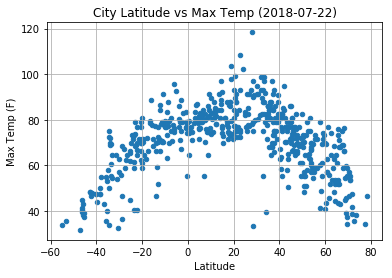

In [58]:
cities_df.plot.scatter(["Lat"], ["Max Temperature (F)"], marker ='o', alpha = 1, grid = True)

# Chart title
plt.title("City Latitude vs Max Temp (2018-07-22)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Max Temp (F)")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Max Temp.png")
plt.show()

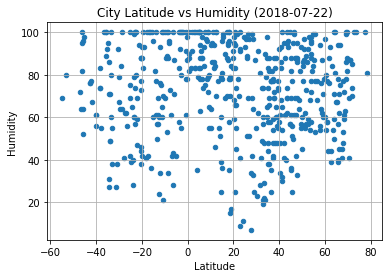

In [59]:
cities_df.plot.scatter(["Lat"], ["Humidity"], marker ='o', alpha = 1, grid = True)

# Chart title
plt.title("City Latitude vs Humidity (2018-07-22)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Humidity")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Max Humidity.png")
plt.show()

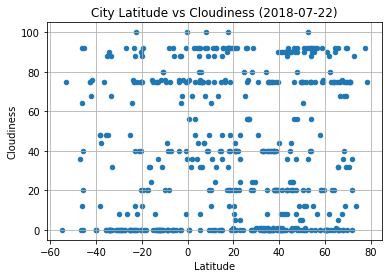

In [60]:
cities_df.plot.scatter(["Lat"], ["Cloudiness"], marker ='o', alpha = 1, grid = True)

# Chart title
plt.title("City Latitude vs Cloudiness (2018-07-22)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Cloudiness")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

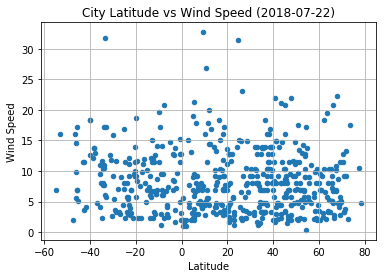

In [61]:
cities_df.plot.scatter(["Lat"], ["Wind Speed"], marker ='o', alpha = 1, grid = True)

# Chart title
plt.title("City Latitude vs Wind Speed (2018-07-22)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Wind Speed")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Wind Speed.png")
plt.show()